# Programming Solutions: Discriminative vs Generative Models
**Course:** Artificial Intelligence (2025) · Shiraz University

## Task 1 – Data Exploration & Gaussian Fitting
**Bullet‐by‐bullet requirements**
1. Handle missing or invalid values via deletion or imputation.
2. Plot distributions (histogram or KDE) of all features per class.
3. Select two informative features (e.g. `chol` and `thalach`).
4. Fit **2‑D Gaussian** distributions (one per class) and plot contour maps.
5. Evaluate Gaussian assumption via plots and (optional) normality tests.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#########################
# 1) Load & clean data  #
#########################
PATH = 'data/heart_disease_uci.csv'
df = pd.read_csv(PATH)

print(f'Dataset shape: {df.shape}')

Dataset shape: (920, 16)


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
# extract the target column
df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.num.head()

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

In [13]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

### Handling Missing Data: Rationale

We applied different strategies for handling missing data based on the proportion of missing values and the nature of each column:

#### ✅ Imputed Columns:
- **`trestbps`**, **`chol`**, **`thalch`**, **`oldpeak`**:
  These are numerical columns with relatively low missingness (<10%).
  ➤ Imputed using **median** to avoid skewing distributions.

- **`fbs`**, **`restecg`**, **`exang`**:
  These are categorical (or binary-like) columns with manageable missingness.
  ➤ Imputed using **mode** (most frequent value).

#### ❌ Dropped Columns:
- **`slope`** (~34% missing), **`ca`** (~66% missing), **`thal`** (~53% missing):
  These columns have a **high percentage of missing values**, making imputation unreliable and potentially biased.
  ➤ Chosen to **drop** these columns to maintain data integrity.

This approach balances preserving valuable data while avoiding distortion due to excessive imputation.


In [14]:
# Handle missing data: impute or delete based on proportion and type

# Impute numeric columns with median
df['trestbps'].fillna(df['trestbps'].median(), inplace=True)  # ~6% missing
df['chol'].fillna(df['chol'].median(), inplace=True)          # ~3% missing
df['thalch'].fillna(df['thalch'].median(), inplace=True)      # ~6% missing
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)    # ~7% missing

# Impute categorical columns with mode
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)            # ~10% missing
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)    # <1% missing
df['exang'].fillna(df['exang'].mode()[0], inplace=True)        # ~6% missing

# Drop columns with high missingness
df.drop(columns=['slope', 'ca', 'thal'], inplace=True)         # >30% missing

# Final check
print("Remaining missing values:\n", df.isnull().sum())


Remaining missing values:
 id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64


### Feature Distributions by Target Class

We visualized the distribution of each feature in the dataset, split by the `num` target class:

- **Numerical features** (e.g., `age`, `chol`, `thalch`) were plotted using **KDE (Kernel Density Estimate)** to compare the shapes of their distributions between classes.
- **Categorical features** (e.g., `sex`, `cp`, `restecg`) were plotted using **count plots** to show the frequency of each category per class.

These plots help in understanding which features might be informative for distinguishing between patients with and without heart disease.


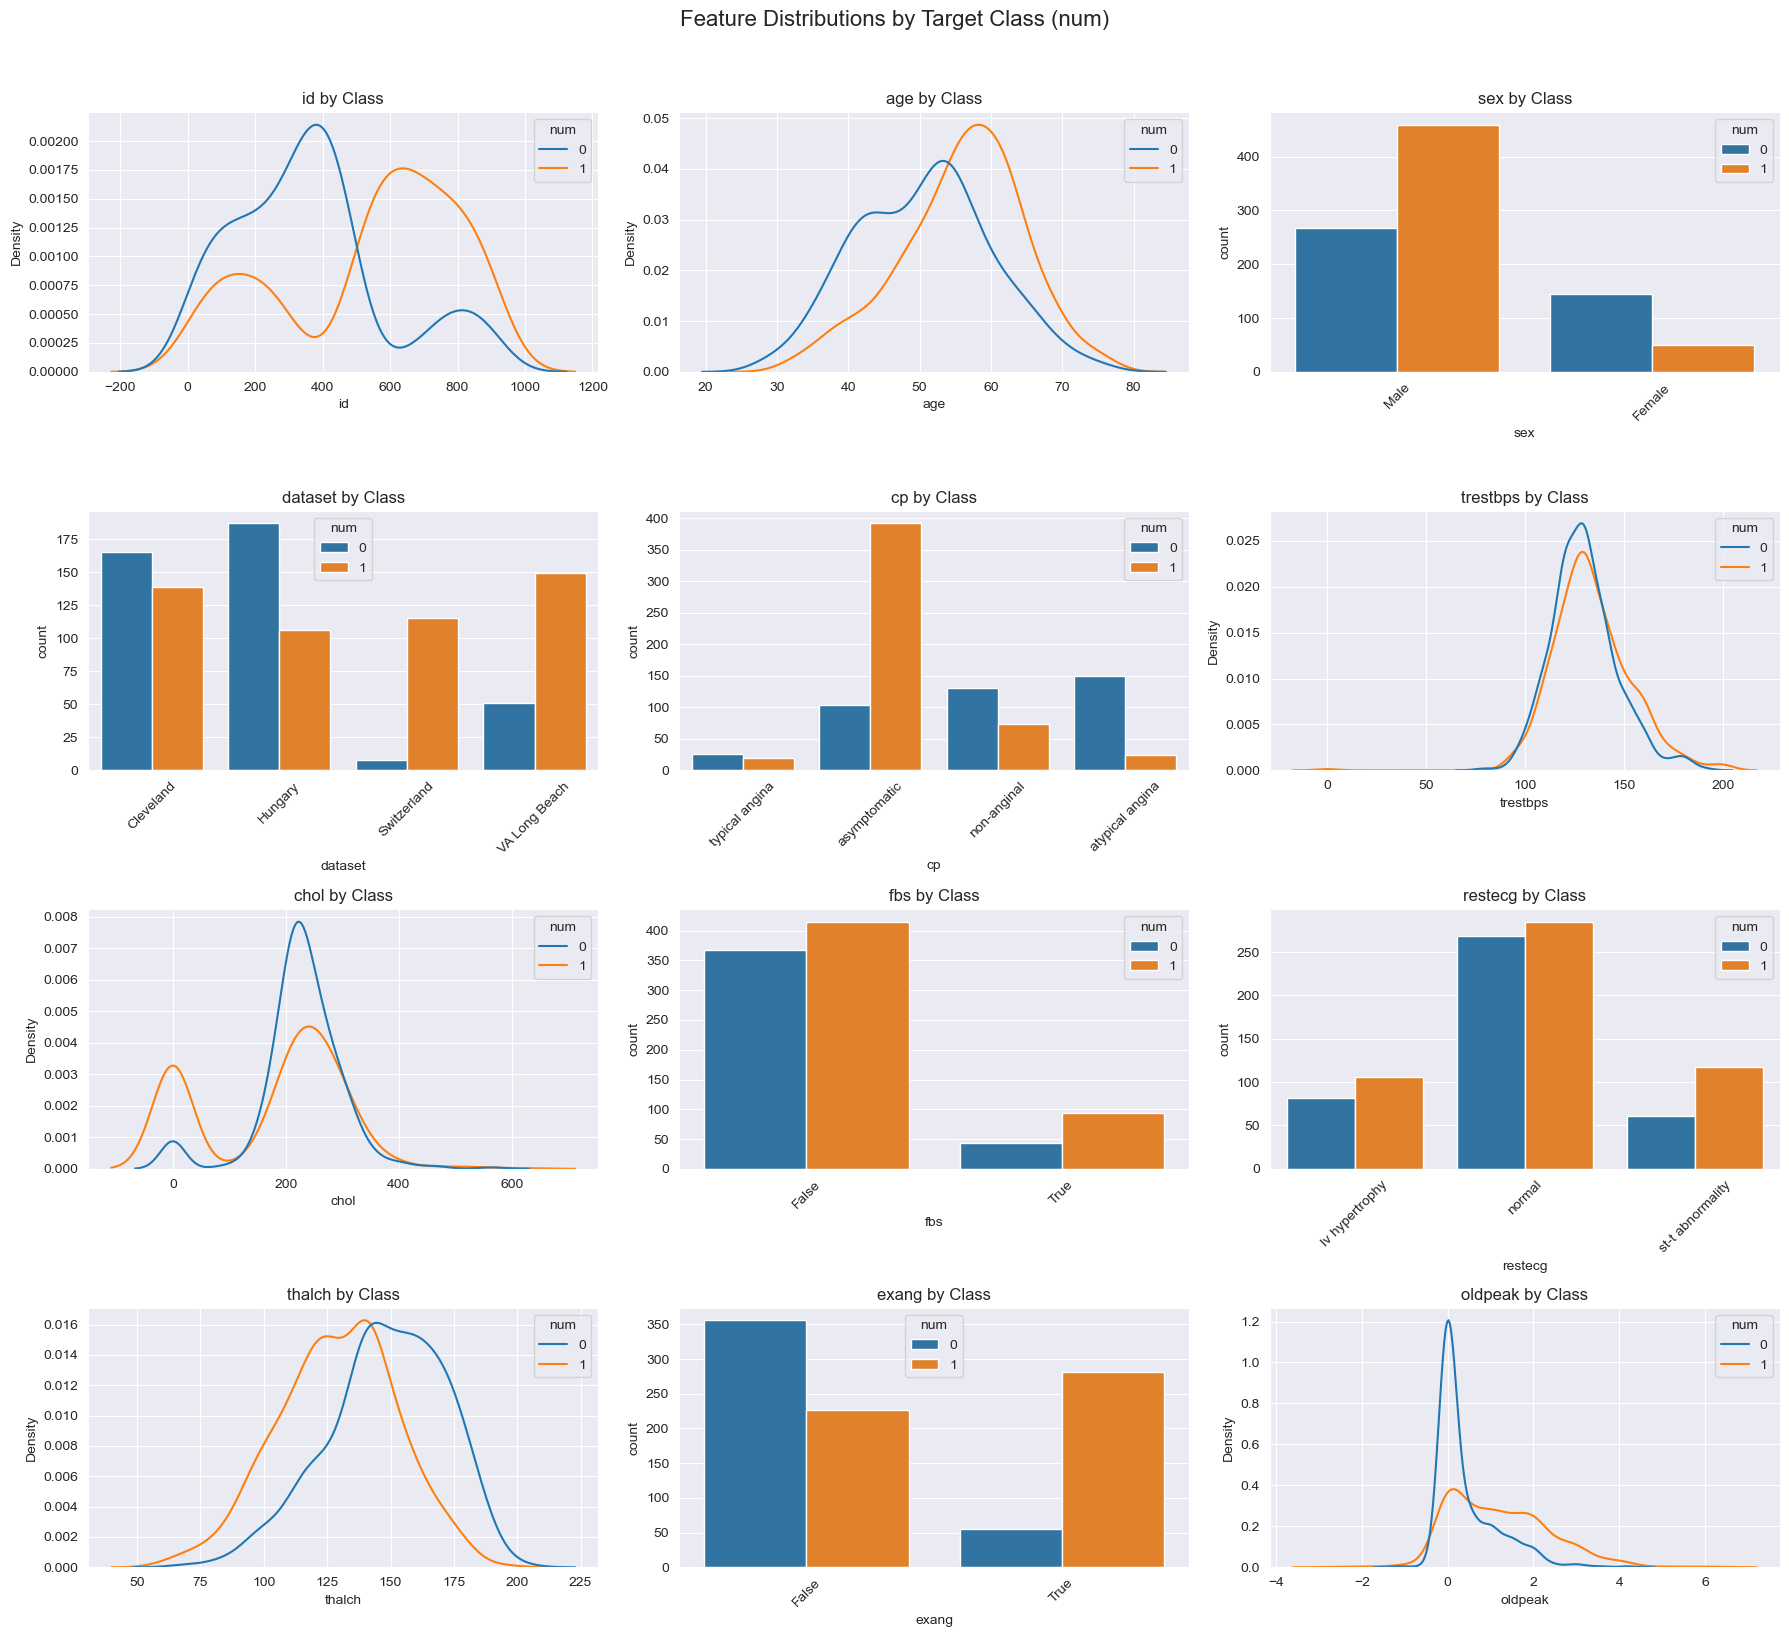

In [16]:
# Identify feature columns and target
feature_cols = [col for col in df.columns if col != 'num']
target_col = 'num'

# Define grid dimensions
cols = 3
rows = (len(feature_cols) + cols - 1) // cols  # equivalent to math.ceil

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))
axes = axes.flatten()

# Plot each feature
for i, col in enumerate(feature_cols):
    ax = axes[i]

    if df[col].dtype in ['float64', 'int64']:
        sns.kdeplot(data=df, x=col, hue=target_col, common_norm=False, ax=ax)
    else:
        sns.countplot(data=df, x=col, hue=target_col, ax=ax)
        ax.tick_params(axis='x', rotation=45)

    ax.set_title(f'{col} by Class')

# Remove extra subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Feature Distributions by Target Class (num)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()